# Data Description

The task is to train a machine learning model to predict the doctor’s consulting fee. We have data that records important details about a doctor which will help us to predict the same. Our dataset is bifurcated into two sets i.e. Training set and Testing set. 

Size of our Dataset -

    Size of training set: 5961 records
    Size of test set: 1987 records

Important Features-
      
    Qualification: Qualification and degrees held by the doctor
    Experience: Experience of the doctor in number of years
    Rating: Rating given by patients
    Profile: Type of the doctor
    Miscellaneous_Info: Extra information about the doctor
    Fees: Fees charged by the doctor (Target Variable)
    Place: Area and the city where the doctor is located.

# Importing Dataset

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing Training Dataset
df=pd.read_excel('Final_Train.xlsx')
#Visualizing first 5 rows of dataset
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


The DataFrame consists of 7 columns including the Target Variable.

In [5]:
#Checking columns in dataframe
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [6]:
#CHecking shape of dataframe
df.shape

(5961, 7)

Initially, we have 5961 rows and 7 columns in the dataset.

# Checking Null Values & Treating Them

In [7]:
#Checking Null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

We can see that we have more than 50% missing data in the 'Rating' column so we drop the column. 'Miscellaneous_info' also has around 44% missing column which is neither a continuous data nor a nominal data and also shows not much importance to our dataset hence we drop this column as well. We will impute the 'Place' column.

In [8]:
#Droping the Rating & Miscellaneous info from the dataset
df.drop(['Rating','Miscellaneous_Info'],axis=1,inplace=True)

In [9]:
#Filling the place column using simle Imputer
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')

df['Place']=imp.fit_transform(df['Place'].values.reshape(-1,1))

df

,Qualification,Experience,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,"Keelkattalai, Chennai",Ayurveda,250
5,BAMS,8 years experience,"Porur, Chennai",Ayurveda,100
6,BHMS,42 years experience,"Karol Bagh, Delhi",Homeopath,200
7,BDS,10 years experience,"Arekere, Bangalore",Dentist,200
8,"MBBS, MD - General Medicine",14 years experience,"Old City, Hyderabad",General Medicine,100
9,"BSc, BDS",23 years experience,"Athani, Ernakulam",Dentist,100


All the modifications that we have made can be seen in the above information i.e. 2 rows have been dropped and place column have been replaced with it's null values. Now, we are left with 5961 rows and only 5 columns in the dataset.

In [10]:
#Verifying null values again
df.isnull().sum()

Qualification    0
Experience       0
Place            0
Profile          0
Fees             0
dtype: int64

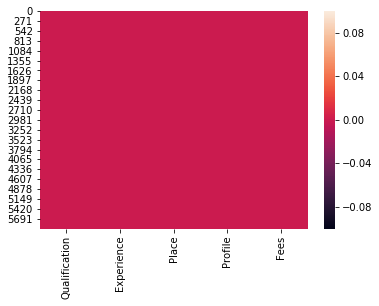

In [59]:
#Visualizing null values through heatmap
import seaborn as sns
sns.heatmap(df.isnull())

As we cannot see any null values in our data. Hence, we proceed forward with Visualizing the data.

# Encoding of DataFrame

In [12]:
#Checking datatypes of each column
df.dtypes

Qualification    object
Experience       object
Place            object
Profile          object
Fees              int64
dtype: object

All the input features of our dataset are of 'object' datatype and only the target variable has integer datatype. We will encode our data to transform all string values int0 float values to do the further processing.

In [13]:
#Encoding data using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [14]:
#COnverting all string values into float values
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [15]:
df

,Qualification,Experience,Place,Profile,Fees
0,401.0,16.0,299.0,5.0,100
1,73.0,3.0,866.0,0.0,350
2,1135.0,63.0,457.0,3.0,300
3,464.0,3.0,68.0,0.0,250
4,10.0,12.0,337.0,0.0,250
5,10.0,62.0,610.0,0.0,100
6,351.0,36.0,326.0,5.0,200
7,134.0,1.0,33.0,1.0,200
8,943.0,5.0,546.0,4.0,100
9,465.0,15.0,39.0,1.0,100


We can see all our object datatype values have been converted into float values.

# Data Visualization

In [16]:
#Importing Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

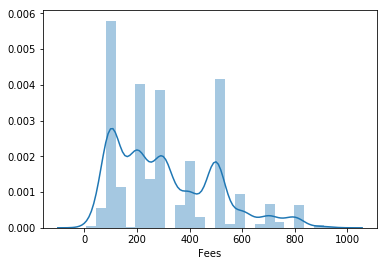

In [17]:
sns.distplot(df['Fees'],kde=True)

The consultation Fees of a doctor lies between 0 and 1000 in the dataset.

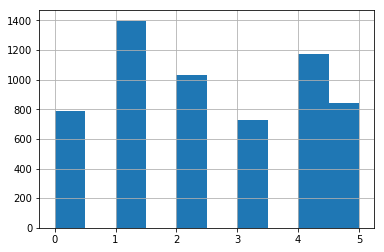

In [18]:
#Univariate Analysis
df['Profile'].hist(grid=True)
plt.show()

The doctor's belong to various profiles but most of them are from profile 1.

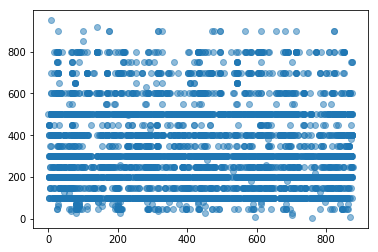

In [19]:
#Bivariate Analysis
plt.scatter(df['Place'],df["Fees"],alpha=0.5)

We do not see any any proper relation between Place and Fees of a doctor. The values are widely scattered.

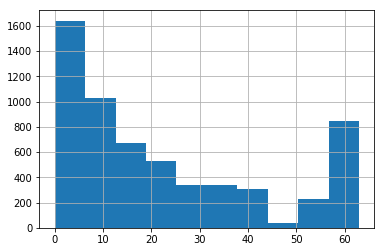

In [20]:
#Univariate Analysis
df['Experience'].hist(grid=True)
plt.show()

The Work Experience of Doctors within the dataset lies between 0 and 60. But most of the doctors have experience between 0 to 10 years.

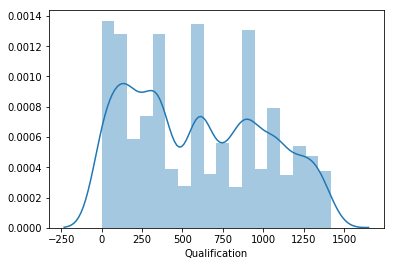

In [21]:
sns.distplot(df['Qualification'],kde=True)

The Qualification values of the Doctors are between 0 to 1400. This means that the Doctors belong from different Qualification backgrounds.

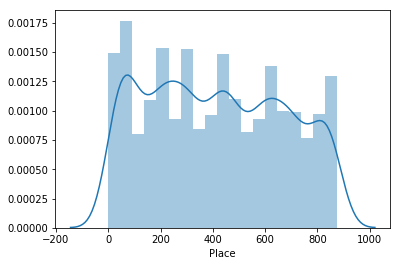

In [22]:
sns.distplot(df['Place'],kde=True)

The place values are between 0 and 900 and the values are equally distributed which means the doctor's have been staying at various different places

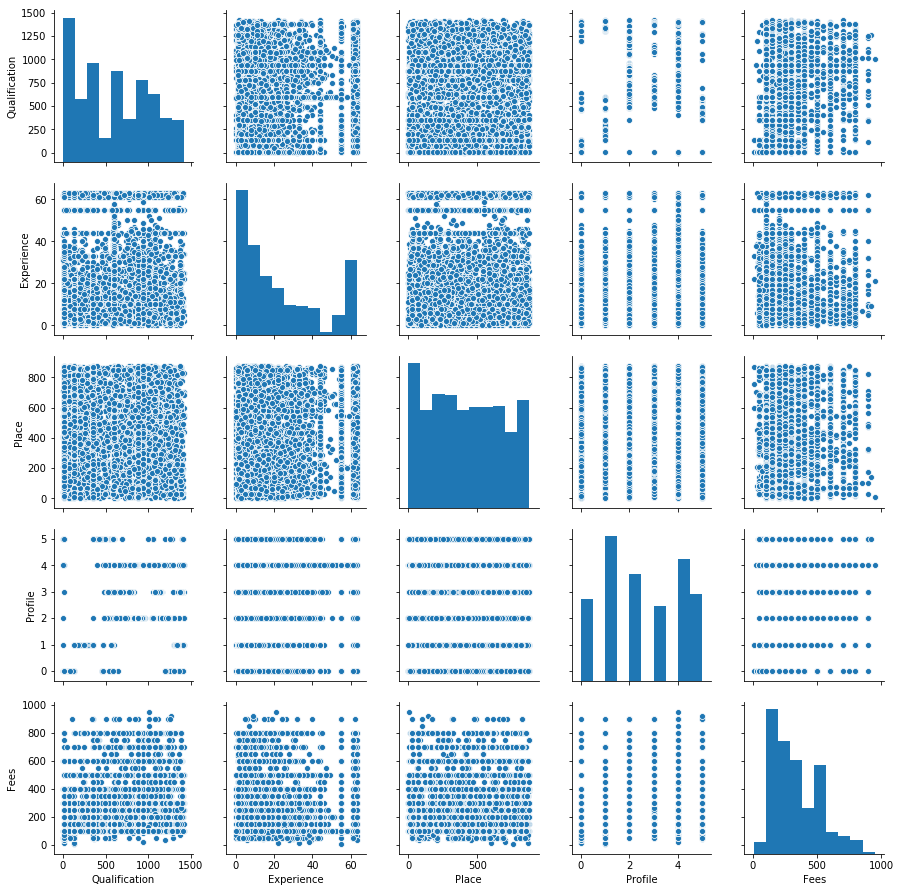

In [23]:
#Multivariate Analysis
sns.pairplot(df)

We cannot see any proper correlation between any Variables within the dataset. Hence we will move forward and try to understand data better.

# Describe Data

In [24]:
#Describing final columns present in dataset
df.columns

Index(['Qualification', 'Experience', 'Place', 'Profile', 'Fees'], dtype='object')

In [25]:
#Defining Shape
df.shape

(5961, 5)

In [26]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 5 columns):
Qualification    5961 non-null float64
Experience       5961 non-null float64
Place            5961 non-null float64
Profile          5961 non-null float64
Fees             5961 non-null int64
dtypes: float64(4), int64(1)
memory usage: 232.9 KB


As we have no Null values and all our values are either of int or float values. Hence we will describe the data.

In [27]:
#Describing mean, median, min, max values of data
df.describe()

,Qualification,Experience,Place,Profile,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,414.368059,2.441872,307.944640
std,413.842446,20.937163,258.547684,1.658014,190.920373
min,0.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,6.000000,197.000000,1.000000,150.000000
50%,596.000000,15.000000,407.000000,2.000000,300.000000
75%,943.000000,36.000000,628.000000,4.000000,500.000000
max,1419.000000,63.000000,876.000000,5.000000,950.000000


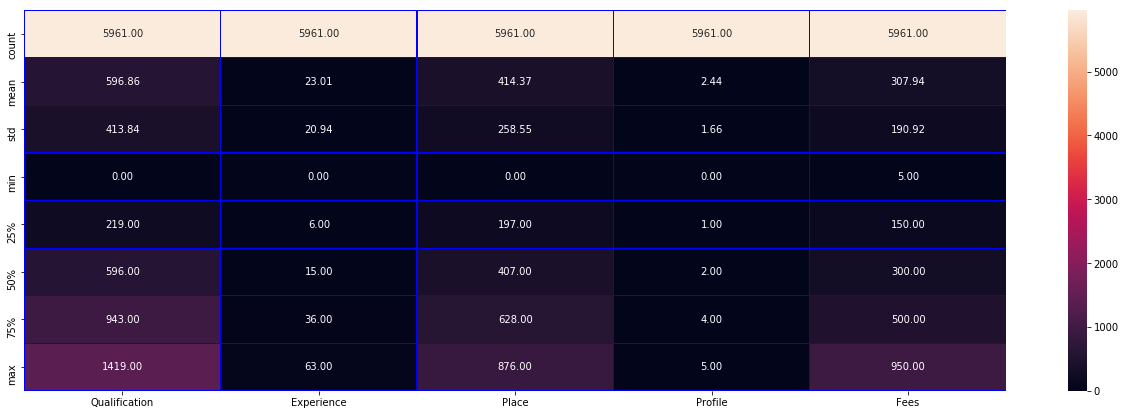

In [28]:
#Visualizing data description
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='blue',fmt='0.2f')

Observations:

The standard deviation of data is huge which says that the values within each columns of dataset are largely scattered.

Looking at the min and max values of our dataset which are not too high shows us no possibility of having any outliers.

The min value of every input feature is 0.

# Correlation of columns with the Target Variable

In [29]:
df.corr()

,Qualification,Experience,Place,Profile,Fees
Qualification,1.000000,0.003325,0.006640,0.393123,0.263214
Experience,0.003325,1.000000,0.001328,-0.032711,-0.048529
Place,0.006640,0.001328,1.000000,0.019529,-0.052505
Profile,0.393123,-0.032711,0.019529,1.000000,0.145226
Fees,0.263214,-0.048529,-0.052505,0.145226,1.000000


We observe both positive and negative correlation in our dataset.

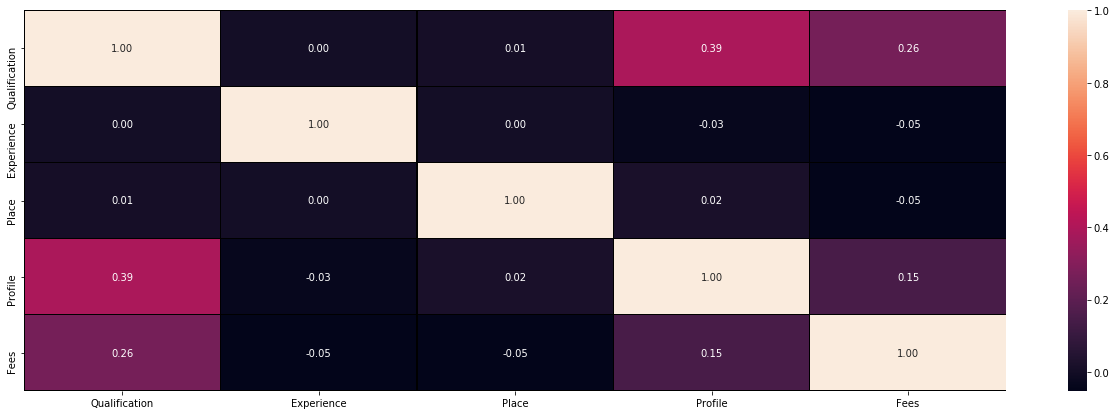

In [30]:
#Plotting correlation of input features with the target Variable
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Observations:
    
The most positively correlated column with the Target Variable is Qualification

The most Negatively correlated column with the Target Variable are Experience & Fees.

We do not observe much correlation between our data. Only two variables show a decent correlation.




In [31]:
#Sorting correlation in order with the Target Variable
corr_matrix=df.corr()
corr_matrix['Fees'].sort_values(ascending=False)

Fees             1.000000
Qualification    0.263214
Profile          0.145226
Experience      -0.048529
Place           -0.052505
Name: Fees, dtype: float64

Qualification and Profile shows positive correlation 

Experience and Place show Negative Correlation.

# Checking Skewness

In [32]:
#Checking Skewness
df.skew()

Qualification    0.239720
Experience       0.823531
Place            0.124862
Profile          0.108803
Fees             0.751870
dtype: float64

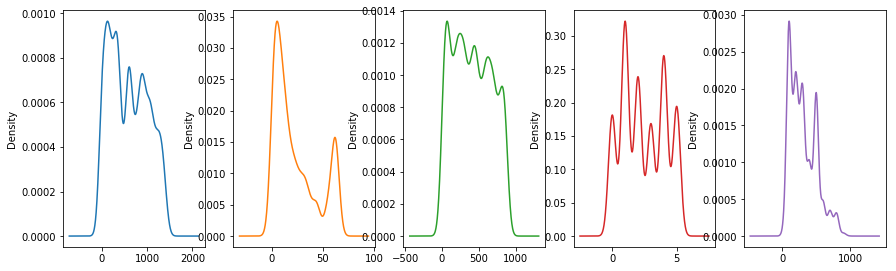

In [33]:
#Visualizing skewness on density graph
#Example of multi variate analysis
df.plot(kind='density',subplots=True,layout=(4,10),legend=False,sharex=False,figsize=(30,20))
plt.show()

As all our input features had object datatype so we can hardly see any skewness in data. 

# Check Outliers

In [34]:
#Checking datatpe of each column
df.dtypes

Qualification    float64
Experience       float64
Place            float64
Profile          float64
Fees               int64
dtype: object

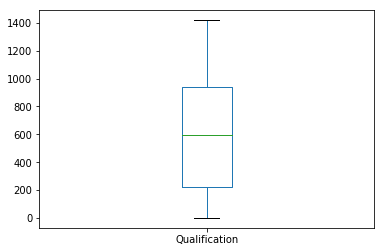

In [35]:
df['Qualification'].plot.box()

No Outliers

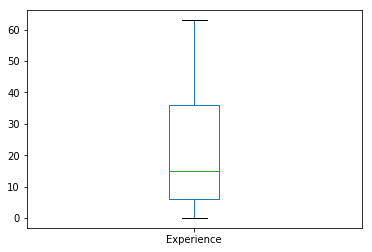

In [36]:
df['Experience'].plot.box()

We cannot see any outliers in the Experience column.

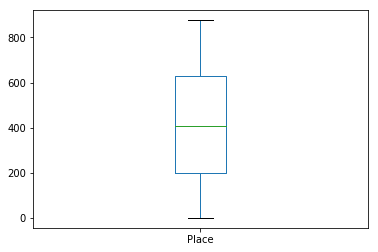

In [37]:
df['Place'].plot.box()

No outliers in Place column either.

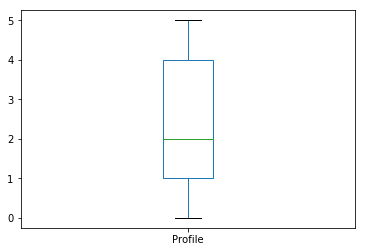

In [38]:
df['Profile'].plot.box()

No Outliers present.

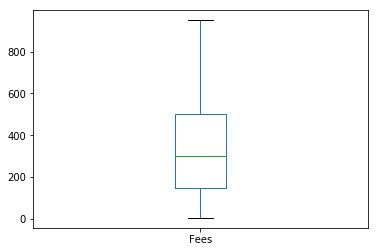

In [39]:
df['Fees'].plot.box()

The target variable also does not have any outliers.

# Separating the Columns into x & y

In [40]:
#Creating x & y columns 
x=df.drop('Fees',axis=1)
y=df['Fees']

Separating the columns into x & y as input featues and target variable respectively.

# Scaling Data using Min Max Scaler

In [41]:
#Importing libraries for Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [42]:
#define min max scaler
mms=MinMaxScaler()
# transform data
ab=mms.fit_transform(df)
print(ab)

[[0.28259338 0.25396825 0.3413242  1.         0.1005291 ]
 [0.05144468 0.04761905 0.98858447 0.         0.36507937]
 [0.79985906 1.         0.5216895  0.6        0.31216931]
 ...
 [0.42001409 0.55555556 0.24657534 0.8        0.62962963]
 [0.6645525  0.0952381  0.97031963 0.8        0.1005291 ]
 [0.17124736 0.12698413 0.68835616 0.2        0.20634921]]


Hence, the data is Scaled.

# Model Building

In [43]:
#Importing libraries to build model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [45]:
#Finding Max accuracy at the best random state
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is ',maxAccu," on Random_state",maxRS)

Best accuracy is  0.10380702532146913  on Random_state 185


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=185)

We split our data into Training and Testing giving 80% data for Training and 20% for Testing at best random state 109. We will use linear Regression to train our model as we have a continuous tye of Target Variable.

In [47]:
#Code for Linear Regression
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Predicted Happiness Score: ",pred)
print('actual Happiness Score: ',y_test)


Predicted Happiness Score:  [373.48301945 360.26295554 234.30881338 ... 352.17002741 254.58177043
 260.24408581]
actual Happiness Score:  2181    200
3517    400
2639    250
5531    100
743     300
3842    100
3806    150
3885    500
2307    200
3033    100
3215    200
5355    500
73      100
2678    200
1745    250
3113    100
1813    400
1047    100
1938    250
2122    300
332     300
2121    100
1494    400
299     250
1835    500
4251    100
560     100
1057     50
1643    200
4212    200
       ... 
5445    500
5486    800
48      400
2844    100
4228    500
2691    300
2090    400
2855    600
2797    250
850     100
2070    150
259     300
2925    400
3521    750
1633    100
1055    200
5646    400
2063    200
1870    500
5166    150
1473    150
4968    300
1566    500
873     400
3063    500
4447    300
382     500
5468    100
4477    100
3161    500
Name: Fees, Length: 1193, dtype: int64


We can see huge variation in Predicted and actual outputs. Hence, we will find the error rate.

In [48]:
#training score
lm.score(x_train,y_train)

0.06918179306182659

In [49]:
#Finding Errors
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 147.05750515758322
Mean squared error: 32641.60004983133
Root Mean squared error: 180.66986480825


We can see huge errors in our model. Oyr model is not able to work properly for the dataset.

In [50]:
print(r2_score(y_test,pred))

0.10517042399656351


The r2 score of the model is 10.51%

# Cross Validation of The Model

In [51]:
#Finding best cv score at a particular cv
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and r2 score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.07620331172622197 and r2 score for training is 0.06871541318837637 and accuracy for the testing is 0.10746106010758072


At cross fold 3 the cv score is 0.07543648943585035 and r2 score for training is 0.06871541318837637 and accuracy for the testing is 0.10746106010758072


At cross fold 4 the cv score is 0.07539388109517281 and r2 score for training is 0.06871541318837637 and accuracy for the testing is 0.10746106010758072


At cross fold 5 the cv score is 0.07402908213169498 and r2 score for training is 0.06871541318837637 and accuracy for the testing is 0.10746106010758072


At cross fold 6 the cv score is 0.07393023317994406 and r2 score for training is 0.06871541318837637 and accuracy for the testing is 0.10746106010758072


At cross fold 7 the cv score is 0.07387443185368481 and r2 score for training is 0.06871541318837637 and accuracy for the testing is 0.10746106010758072


At cross fold 8 the cv score is 0.07458710149329659 and r2 score for t

We get maximum accuracy at cv 3. Hence, we select cv=3.

# Regularization

In [52]:
#Importing Libraries for hyper parameter tuning 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [53]:
#Using Ridge Regression for our Model to solve overfitting and underfitting
from sklearn.linear_model import Ridge

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [54]:
#Code for Ridge Regression
rd=Ridge(alpha=0.0001,random_state=0)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rdd=r2_score(y_test,pred_rd)
rdd

0.1051704240021587

The accuracy that we get after using Ridge Regression is 10.51%

# Ensemble Technique

In [55]:
#Finding best Parameters for Ensemble Techniques
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

parameters={'criterion':['friedman_mse','mse','mae'],'max_features':['auto','sqrt','log2']}
gb=GradientBoostingRegressor()
clf=GridSearchCV(gb,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'auto'}


In [56]:
#Code for Gradient Boosting Regressor
gb=GradientBoostingRegressor(criterion='mse',max_features='auto')
gb.fit(x_train,y_train)
gb.score(x_train,y_train)
pred_y=gb.predict(x_test)

gbs=r2_score(y_test,pred_y)
print('R2 score: ',gbs*100)



R2 score:  19.061020437140964


In [57]:
gbscore=cross_val_score(gb,x,y,cv=3)
gbc=gbscore.mean()
print("Cross Val Score: ",gbc*100)

Cross Val Score:  17.212748524638197


The r2 score after using Gradient Boosting Regressor is 19.06%

The CV score after using Gradient Boosting Regressor is 17.02%


# Saving The Best Model

In [58]:
import pickle
filename='Doctor.pkl'
pickle.dump(gb,open(filename,'wb'))